<a href="https://colab.research.google.com/github/KwonDoRyoung/AdvancedBasicEducationProgram/blob/main/%08abep07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   PyTorch 활용하기

---
##▶︎ 오늘 강의내용
*   Pytorch Tensor 이해하기
*   Pytorch 활용하여 Linear regression 구현
*   Pytorch 활용하여 Logistic regression 구현

---
##⦿   Pytorch Tensor 종류 및 특징
- Tensor는 배열 및 행렬과 유사한 데이터 구조
- Pytorch Tensor는 Numpy ndarray와 유사함
- Pytorch Tensor는 미분에 최적화되어 있음
![Alt Text](https://github.com/KwonDoRyoung/AdvancedBasicEducationProgram/blob/main/markdown_images/doc_tensor.png?raw=true)

In [ ]:
import torch
import numpy as np

data = [[5, 7], [11, 9]]
n_data = np.array([[5, 7], [11, 9]])
t_data = torch.tensor([[5, 7], [11, 9]])

# 보기 쉽게 하기 위해 다음과 같이 표현함
print(f"* list\n{data}\n")
print(f"* numpy:\n{n_data}\n")
print(f"* tensor:\n{t_data}")

* list
[[5, 7], [11, 9]]

* numpy:
[[ 5  7]
 [11  9]]

* tensor:
tensor([[ 5,  7],
        [11,  9]])


###• Random & Constant 
  - 다양한 텐서를 생성할 수 있음

In [22]:
import torch

x = torch.empty(5,4) # 비어있는 행렬
print(x)

x = torch.rand(5,4) # 무작위 행렬
print(x)

x = torch.eye(5) # 단위행렬 I
print(x)

x = torch.zeros(5,4) # 영행렬
print(x)

x = torch.FloatTensor([1,2,3,4,5,6]) # Float
print(x)

x = torch.BoolTensor([1,2,3,4,5,-1,0,-2]) # Boolean 
print(x)

tensor([[1.3579e-25, 3.0949e-41, 7.0065e-44, 7.0065e-44],
        [6.3058e-44, 6.7262e-44, 6.8664e-44, 6.3058e-44],
        [6.7262e-44, 7.1466e-44, 1.1771e-43, 6.7262e-44],
        [6.8664e-44, 8.1275e-44, 7.4269e-44, 7.0065e-44],
        [8.1275e-44, 7.1466e-44, 7.9874e-44, 6.4460e-44]])
tensor([[0.9241, 0.9833, 0.6422, 0.6626],
        [0.7603, 0.6366, 0.2586, 0.9663],
        [0.1503, 0.3585, 0.9049, 0.2864],
        [0.4894, 0.9128, 0.2349, 0.3090],
        [0.3278, 0.2463, 0.0080, 0.0383]])
tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([1., 2., 3., 4., 5., 6.])
tensor([ True,  True,  True,  True,  True,  True, False,  True])


###• 크기가 동일하지만 데이터는 다르게 만드는 Tensor

In [35]:
import torch

t_data = torch.tensor([[5, 7], [11, 9]])

t_ones = torch.ones_like(t_data)
print(f"Ones Tensor:\n {t_ones}")

Ones Tensor:
 tensor([[1, 1],
        [1, 1]])


###• Tensor 의 부가적인 속성
  - shape or size: 형태
  - dim: 차원

In [34]:
import torch

t = torch.tensor([[[255,99,255],[128,8,39],[1,3,52],[128,0,128],[1,3,52],[0,255,255]],
                  [[255,9,255],[128,123,39],[1,3,52],[255,9,255],[128,123,39],[1,3,52]],
                  [[1,3,52],[128,0,128],[255,255,0],[255,99,255],[128,8,39],[1,3,52]],
                  [[128,0,128],[1,3,52],[0,255,255],[255,9,255],[128,123,39],[1,3,52]]])
print(f"Size: {t.size()}")
print(f"Shape: {t.shape}")
print(f"dim: {t.dim()}")

Size: torch.Size([4, 6, 3])
Shape: torch.Size([4, 6, 3])
dim: 3


---
##⦿   Pytorch Tensor 연산

###• Slicing & Indexing
  - numpy와 동일한 Slicing & Indexing 연산을 가짐

In [38]:
import torch

x = torch.FloatTensor([1,2,3,4,5,6]) # Float
print(x)
print(x[1:3])
print(x[3])
print(x[3:4]) # 아래의 

tensor([1., 2., 3., 4., 5., 6.])
tensor([2., 3.])
tensor(4.)
tensor([4.])


###• Reshape & Squeeze & Concatenate or Stack
  - 행렬의 구조를 변경하는 함수
    - Reshape: 행령의 형태를 변경하는 함수 
    - Squeeze: 행렬의 특정 축을 추가하는 함수
    - Unsqueeze: 행렬 중 1의 크기를 가지는 축을 줄임
    - Concatenate(cat or stack): 두 행렬을 특정 축으로 결합시킴(특정 축 방향이 동일한 크기여야함)

In [54]:
t = np.array([[[0, 1, 2], [3, 4, 5]], [[6, 7, 8], [9, 10 ,11]]])
ft = torch.FloatTensor(t)
print(ft.shape)

print("\n3차원 텐서에서 2차원 텐서로 변경")
print(ft.view([-1, 3]))
print(ft.view([-1, 3]).shape)

print("\n3차원 텐서의 크기 변경")
print(ft.view([-1, 1, 3]))
print(ft.view([-1, 1, 3]).shape)

print("\n스퀴즈: -1차원을 제거한다.")
ft = torch.FloatTensor([[0], [1], [2]])
print(ft.shape)
ft = ft.squeeze()
print(ft.shape)

print("\n언스퀴즈: 특정 위치에 1인 차원을 추가한다.")
ft = torch.Tensor([0, 1, 2])
print("\t 0 차원 추가")
print(ft.shape)
ft = ft.unsqueeze(0)
print(ft.shape)

print("\n2차원으로 변경")
print(ft)
ft = ft.view(1, -1)
print(ft.shape)
print(ft)

print("\n 차원 추가")
print(ft.shape)
print(ft)
ft = ft.unsqueeze(-1)
print(ft.shape)
print(ft)

print("\n연결하기")
x = torch.FloatTensor([[1,2], [3,4]])
y = torch.FloatTensor([[5,6], [7,8]])
print(torch.cat([x,y], dim=0))
print(torch.cat([x,y], dim=1))

torch.Size([2, 2, 3])

3차원 텐서에서 2차원 텐서로 변경
tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])

3차원 텐서의 크기 변경
tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])

스퀴즈: -1차원을 제거한다.
torch.Size([3, 1])
torch.Size([3])

언스퀴즈: 특정 위치에 1인 차원을 추가한다.
	 0 차원 추가
torch.Size([3])
torch.Size([1, 3])

2차원으로 변경
tensor([[0., 1., 2.]])
torch.Size([1, 3])
tensor([[0., 1., 2.]])

 차원 추가
torch.Size([1, 3])
tensor([[0., 1., 2.]])
torch.Size([1, 3, 1])
tensor([[[0.],
         [1.],
         [2.]]])

연결하기
tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


###• 행렬 연산
  1. 사칙연산 중 덧셈과 뺄셈은 일반적인 a+b, a-b 따름
    - 행렬 연산의 경우 동일한 크기
    - 상수 연산의 경우 동일할 필요 없음(Bias)
  2. 곱셈에서는 2가지로 분리
    - *기호: 원소끼리의 곱하기
    - @기호: 행렬 곱하기
  3. 나눗셈 기호는 스칼라 값에 대해서만 가능
  4. 역행령의 경우 함수를 이용함: torch.inverse(tensor)

In [ ]:
import torch

A = torch.arange(1.0, 13.0).view(4, 3)
B = torch.rand(4, 3)
C = torch.rand(3, 4)
print(A)
print(B)
print(C)

#(1). 행렬의 덧셈
print(A+B)

#(2). 행렬의 뺄셈
print(A-B)

#(3). 행렬에 상수를 빼거나 더하기
print(A-1)
print(B+2)

#(4). 행렬의 곱셈
print(A*B) #그냥 원소별로 곱해짐
print(A@C) #행렬 곱

#(5). 역행렬
t = torch.FloatTensor([[1,2], [3,4]])
print(t)
print(torch.inverse(t))

---
##⦿   Numpy ⇔ Tensor 고찰
1. CPU Type
  -  기본적으로 메모리(Memory) 위치(location)을 공유함
  -  하나의 값이 변경되면 다른 하나의 값도 변경될 수 있음
  - Numpy ⇒ Tensor
  ```python
    ndarray = np.ones(15) # numpy ndarray
    tensor_array = torch.from_numpy(ndarray) 
  ```
  - Tensor ⇒ Numpy
  ```python
    tensor_array = torch.ones(15) # torch tensor
    ndarray = tensor_array.numpy()
  ```
2. GPU Type
  -  CPU 메모리(Memory)에서 GPU 메모리(Memory)로 복사하기 때문에 완전히 다른 객체로 인식함
  - Numpy(CPU)  Tensor(GPU)
  ```python
    ndarray = np.ones(15) # numpy ndarray
    tensor_array = torch.from_numpy(ndarray).to("cuda")
  ```
  - Tensor(GPU) ⇒ Numpy(CPU)
  ```python
    tensor_array = torch.ones(15)
    ndarray = tensor_array.cpu().numpy()
  ```


In [9]:
import torch
import numpy as np

n = np.ones([3,5])
t = torch.from_numpy(n)
print(n)
print(t)

np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], dtype=torch.float64)
t: tensor([[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]], dtype=torch.float64)
n: [[2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]]


In [12]:
import torch
import numpy as np

t = torch.ones([3,5])
n = t.numpy()

print(n)
print(t)

t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
t: tensor([[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]])
n: [[2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]]


In [13]:
import torch
import numpy as np

n = np.ones([3,5])
t = torch.from_numpy(n).to("cuda")
print(n)
print(t)

np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], device='cuda:0', dtype=torch.float64)
t: tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], device='cuda:0', dtype=torch.float64)
n: [[2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]]


In [15]:
import torch
import numpy as np

t = torch.ones([3,5]).to("cuda")
n = t.cpu().numpy()

print(n)
print(t)

t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], device='cuda:0')
t: tensor([[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]], device='cuda:0')
n: [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


---
##⦿   Linear regression 구현
  1. 가설(Hypothesis) 수립
    - 주어진 데이터에 맞는 가설을 수립
    - 예) 키와 체중의 관계는 선형적인 관계를 가지기 때문에 선형 회귀(Linear Regression)
    - 예) 개와 고양기 분류는 0(False) 또는 1(True) 이진분류를 가지기 때문에 로지스틱 회귀(Logistic Regression)
    - 예) 다양한 객체를 분류하는 문제는 소프트맥스 회귀(Softmax Regression)
  2. 손실 or 비용 함수(Cost Function)
    - 주어진 문제를 해결하기 위한 목적함수
    - Mean Square Error, Cross Entropy Loss 등
  3. 최적화(Optimization) 알고리즘
    - 주어진 목적함수를 최소화하는 알고리즘
    - 경사하강법(Gradient Descent) 등

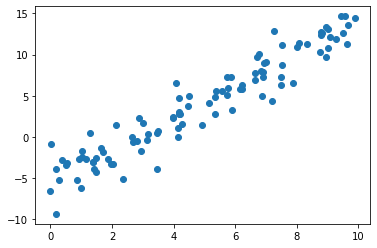

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# 가상의 데이터 준비
rng = np.random.RandomState(1)
x = 10 * rng.rand(100)
y = -5 + 2 * x + (rng.randn(100) - 0.5) * 2
plt.scatter(x, y)

torch.Size([1, 100]) torch.Size([1, 100])
tensor([0.], requires_grad=True) tensor([0.], requires_grad=True)
[0/100] Loss: 50.8132
	w: tensor([0.7133], requires_grad=True)
	b: tensor([0.0777], requires_grad=True)
[50/100] Loss: 8.3339
	w: tensor([1.2768], requires_grad=True)
	b: tensor([-1.1767], requires_grad=True)
tensor([1.4269], requires_grad=True) tensor([-2.1657], requires_grad=True)


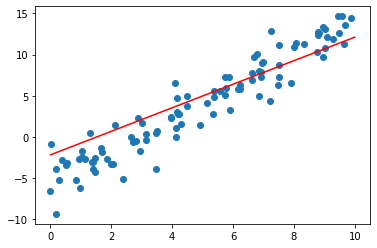

In [117]:
import torch
import torch.nn as nn

# 학습데이터로 numpy -> torch
x_train = torch.from_numpy(x).unsqueeze(0)
y_train = torch.from_numpy(y).unsqueeze(0)
print(x_train.size(), y_train.size())

# 선형 회귀를 위한 학습 파라미터 선언
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
print(w, b)

# 학습률 설정
lr = 0.01
end_epoch = 100

for epoch in range(end_epoch):
  pred = w * x_train + b # 가정한 함수 모양
  cost = torch.mean((pred - y_train)**2) # 손실함수
  cost.backward() # 역전파
  with torch.no_grad():
    w = (w - lr * w.grad).requires_grad_(True) # 각 미분값을 통한 Gradient Decsent
    b = (b - lr * b.grad).requires_grad_(True) # 각 미분값을 통한 Gradient Decsent   
  if epoch % 50 == 0:
    print(f"[{epoch}/{end_epoch}] Loss: {cost.item():.4f}")
    print(f"\tw: {w}")
    print(f"\tb: {b}")
print(w, b)

# 결과 확인
# 기존 데이터 출력
x = x_train.squeeze().numpy()
y = y_train.squeeze().numpy()
plt.scatter(x, y)

temp_x = np.linspace(0, 10)
pred_y = w.detach().numpy()*temp_x + b.detach().numpy()
plt.plot(temp_x, pred_y, color="red")

---
##⦿   Logistic regression 구현

-4.998856251826551 4.888610889064947


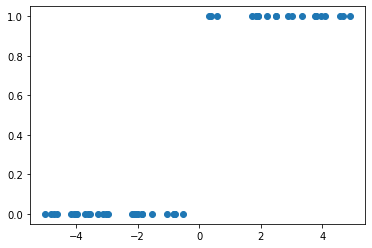

In [135]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 +np.exp(-x))

# 가상의 데이터 준비
rng = np.random.RandomState(1)
x = (rng.rand(50) - 0.5) * 10
print(x.min(), x.max())
temp_y = sigmoid(x)

temp_y[temp_y >=0.5] = 1
temp_y[temp_y < 0.5] = 0
y = temp_y.copy()
plt.scatter(x, y)

torch.Size([1, 50]) torch.Size([1, 50])
[0/100] Loss: 0.6931
[50/100] Loss: 0.0295
tensor([3.5241], requires_grad=True) tensor([0.0883], requires_grad=True)


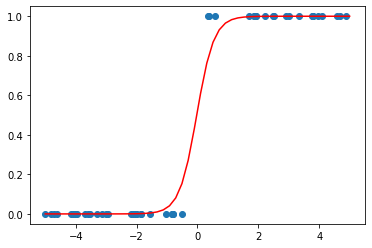

In [139]:
import torch
import torch.nn as nn

# 학습데이터로 numpy -> torch
x_train = torch.from_numpy(x).unsqueeze(0)
y_train = torch.from_numpy(y).unsqueeze(0)
print(x_train.size(), y_train.size())

# 모델 초기화
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = torch.optim.SGD([w, b], lr=1)

# 학습률 설정
lr = 0.01
end_epoch = 100

for epoch in range(end_epoch):
  # Cost 계산
  pred = torch.sigmoid(x_train*w + b)
  cost = -(y_train * torch.log(pred) + (1 - y_train) * torch.log(1 - pred)).mean()
  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step() 
  if epoch % 50 == 0:
    print(f"[{epoch}/{end_epoch}] Loss: {cost.item():.4f}")
print(w, b)

# 결과 확인
# 기존 데이터 출력
x = x_train.squeeze().numpy()
y = y_train.squeeze().numpy()
plt.scatter(x, y)

temp_x = np.linspace(-5, 5)
pred_y = sigmoid(w.detach().numpy()*temp_x + b.detach().numpy())
plt.plot(temp_x, pred_y, color="red")

* https://wikidocs.net/72986
* https://greeksharifa.github.io/pytorch/2018/11/02/pytorch-usage-02-Linear-Regression-Model/
* https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817
* https://wikidocs.net/53560